In [321]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 

In [322]:
df = pd.read_csv('datasets_478_974_mushrooms.csv')

In [323]:
sns.set(rc={'figure.figsize': (9, 6)})

# Ответы на вопросы

In [324]:
import seaborn as sns

Посмотрим на распределение цветов среди съедобных грибов

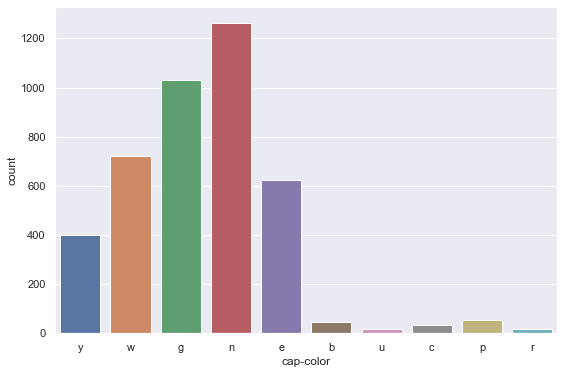

In [325]:
sns.countplot(df.loc[df['class'] == 'e']['cap-color']);

Видно, что чаще всего встречается цвет, закодированный буквой "n". В документации сказано, что под этому коду соответствует коричневый цвет.  
Но график не позваляет точно определить, какой цвет встречается реже всего. Чтобы определить это посмотрим на числовое представление этого графика.

In [326]:
df['cap-color'].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64

Реже всего встречаются два цвета, они закодированы буквами 'r' и 'u'. Под этими буквами скрываются зеленый и фиолетовый цвета соответственно.

# Классификатор

Посмотрим на верхнюю часть датасета. Видно, что очень много данных сроковых.

In [327]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Просмотрим информацию о датасете

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Так как sklearn не работает с нечисловыми данными, надо перевести все данные в числовой вид.

In [329]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [330]:
for column in df:
    le.fit (df[column])
    df[column] = le.transform(df[column])

Посмотрим на обновленную таблицу.

In [331]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Теперь создадим random forest из 5 деревьев.

In [332]:
rf = RandomForestClassifier(n_estimators=5, max_depth=5)

Разделим датасет на несколько групп для обучения и для теста.

In [333]:
X = df.drop('class', axis=1)
y = df['class']

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25 , random_state = 42)

Обучим наш лес.

In [335]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Предсказываем съедобность грибов и проверяем точность предсказаний.

In [336]:
predictions = rf.predict(X_test)

In [337]:
from sklearn.metrics import accuracy_score

In [338]:
accuracy_score(y_test, predictions)

0.98703430165764